In [1]:
from sodapy import Socrata
import cartopy.crs as ccrs
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from getpass import getpass
from datetime import datetime, timedelta

apptoken = widgets.Text(description="Enter App Token:")
startdate = widgets.NaiveDatetimePicker(value = datetime.today())
enddate = widgets.NaiveDatetimePicker(value = startdate.value + timedelta(days=7))
search = widgets.Button(description="Search")
out = widgets.Output()

search.on_click(lambda x: get_work_orders(startdate, enddate))

display(apptoken, widgets.HBox([startdate, enddate, search]), out)

def get_work_orders(startdate, enddate):
    work_orders = "qzfe-wj25"
    client = Socrata("data.norfolk.gov", app_token=apptoken.value)

    try:
        items = pd.DataFrame(client.get(work_orders, where=f"start_date between '{startdate.value.isoformat()}' and '{enddate.value.isoformat()}'"))

        out.append_display_data(items)
    except Exception as ex:
        out.append_display_data(ex)
    
    client.close()


Text(value='', description='Enter App Token:')

Output()

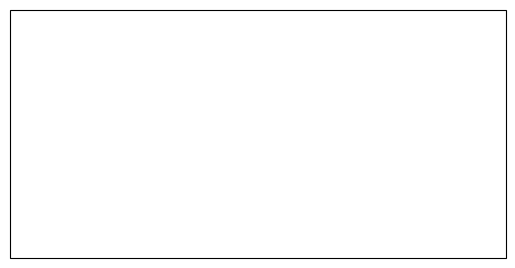

In [2]:
#%%
import cartopy.io.img_tiles as cimgt
google_terrain = cimgt.GoogleTiles(style="satellite")

fig = plt.figure()

ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())

plt.show()